In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dữ liệu RMSE của các mô hình với các optimizer
data = pd.read_excel('/kaggle/input/compare-is403/IS403_ETH_Comparision.xlsx')

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Tách Model và Optimizer
df[['Model', 'Optimizer']] = df['Model'].str.split(' \+ ', expand=True)


<h2> RMSE

<h3> 622

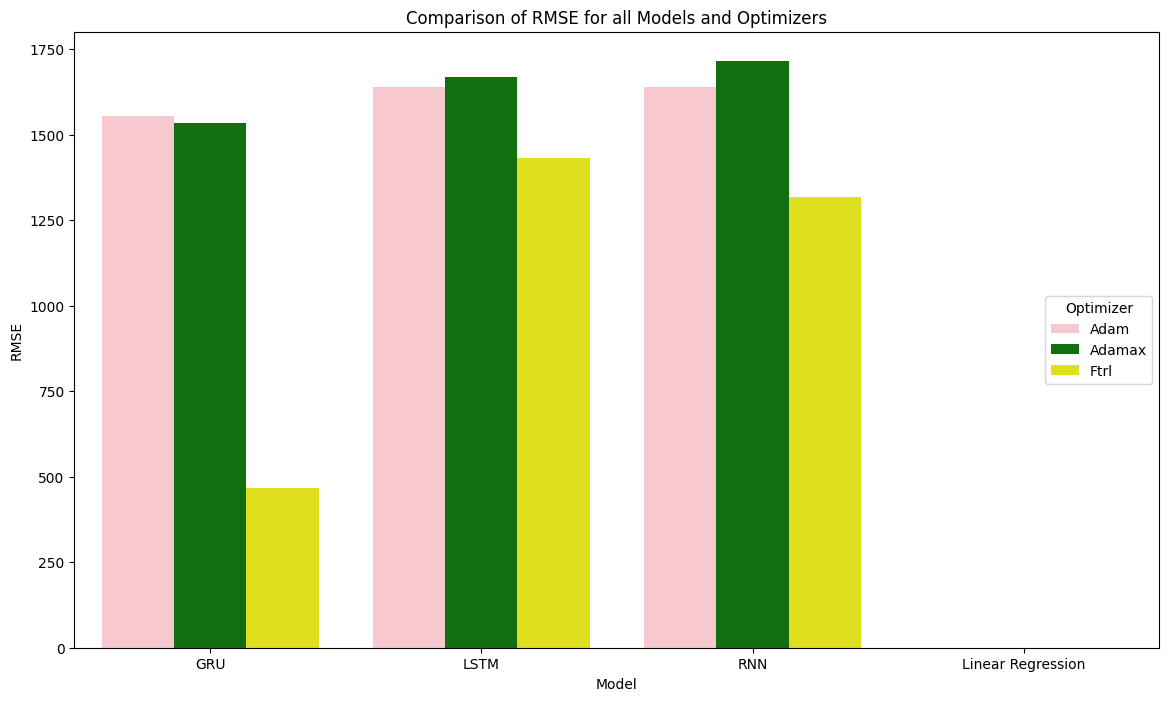

In [24]:
color_palette = {
    'Adam': 'pink',
    'Adamax': 'green',
    'Ftrl': 'yellow'
}

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='RMSE 622', hue='Optimizer', data=df, palette=color_palette)
plt.title('Comparison of RMSE for all Models and Optimizers')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.legend(title='Optimizer', loc='right', bbox_to_anchor=(1, 0.5))
plt.show()

<h3> 721

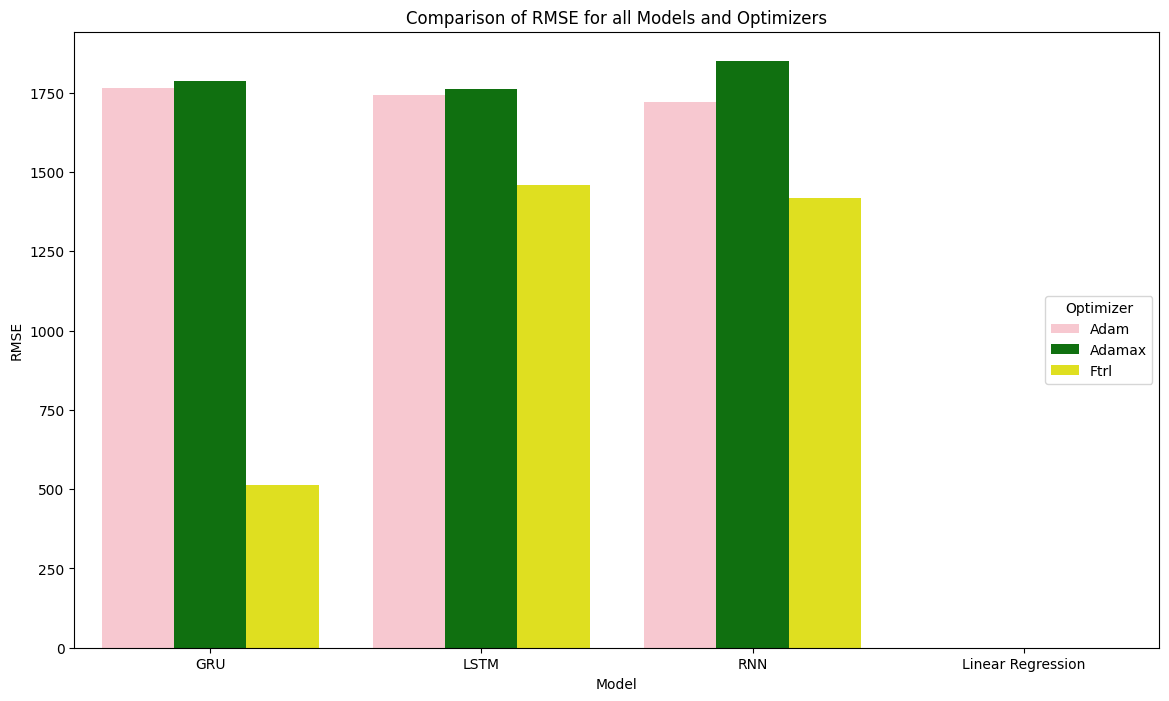

In [27]:
color_palette = {
    'Adam': 'pink',
    'Adamax': 'green',
    'Ftrl': 'yellow'
}

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='RMSE 721', hue='Optimizer', data=df, palette=color_palette)
plt.title('Comparison of RMSE for all Models and Optimizers')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.legend(title='Optimizer', loc='right', bbox_to_anchor=(1, 0.5))
plt.show()

<h2> MSE

<h3> 622

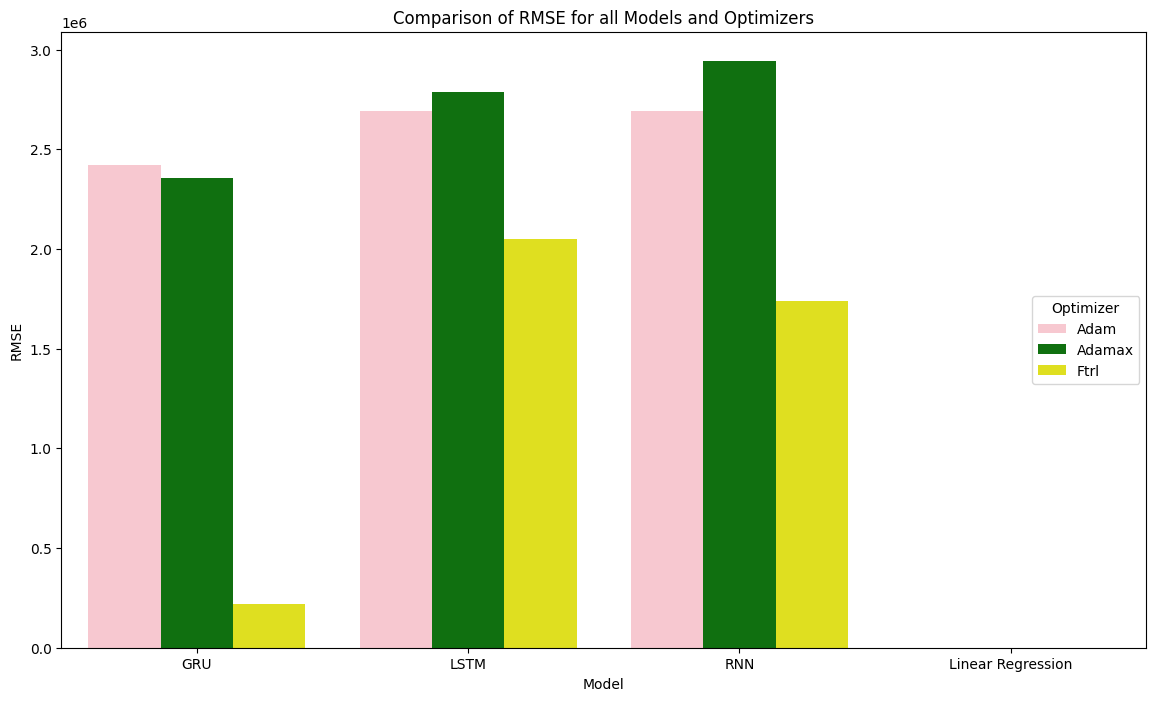

In [25]:
color_palette = {
    'Adam': 'pink',
    'Adamax': 'green',
    'Ftrl': 'yellow'
}

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MSE 622', hue='Optimizer', data=df, palette=color_palette)
plt.title('Comparison of RMSE for all Models and Optimizers')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.legend(title='Optimizer', loc='right', bbox_to_anchor=(1, 0.5))
plt.show()

<h3> 721

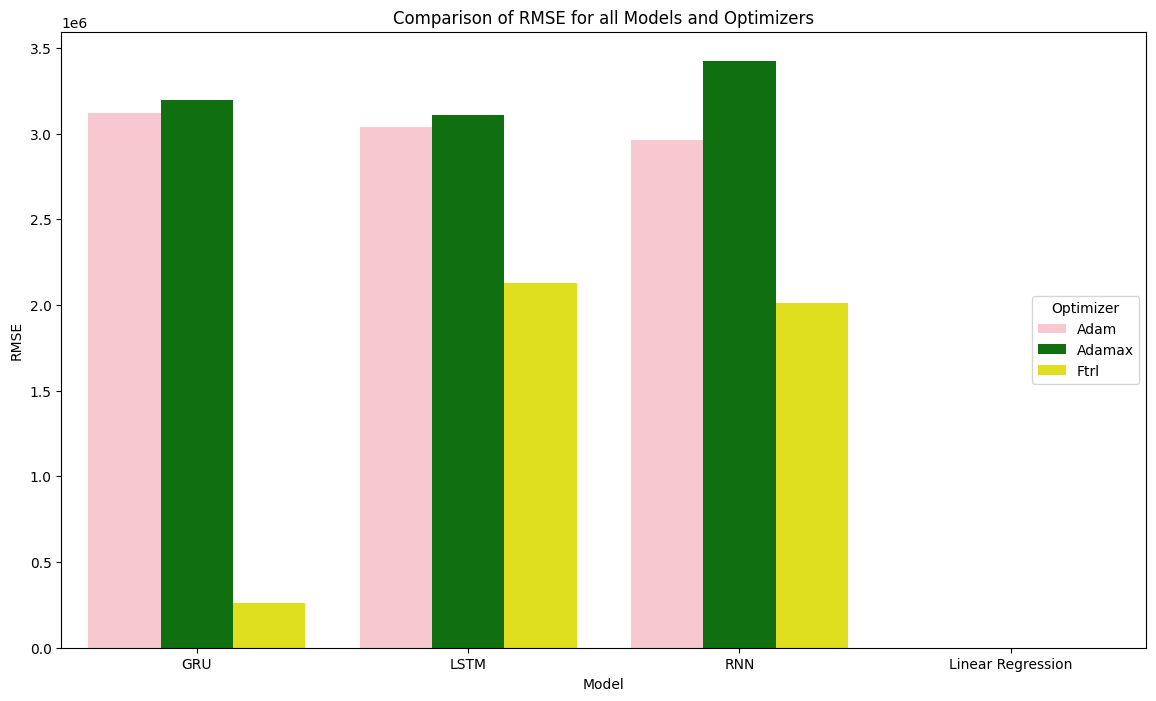

In [28]:
color_palette = {
    'Adam': 'pink',
    'Adamax': 'green',
    'Ftrl': 'yellow'
}

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MSE 721', hue='Optimizer', data=df, palette=color_palette)
plt.title('Comparison of RMSE for all Models and Optimizers')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.legend(title='Optimizer', loc='right', bbox_to_anchor=(1, 0.5))
plt.show()